### Assignment 3
Taner Bulbul  
INST 447

## Research Question: 
Which data science tool is more popular in the data science/statistics community pandas or R?  

## Citations  
These are some of the articles also compare the pandas/python and R  

(1)  Bob Hayes, Analytics, Artificial Intelligence, Data Science (June 29, 2020), https://businessoverbroadway.com/2020/06/29/usage-of-programming-languages-by-data-scientists-python-grows-while-r-weakens/  
(2) Towards Data Science, (Sep 2, 2022), https://towardsdatascience.com/python-vs-r-for-data-science-did-you-make-the-right-choice-7d090dca4786  

### API and Data Source links
https://api.stackexchange.com/docs


**Explanation of the results and analysis are also summarized under each calculation/graph.**
### Take-away message

Overall there are almost twice as many R questions than pandas questions in the three sites (519,000 vs 280,000). Stackoveflow site has the most R and pandas questions among all three sites with much higher R questions than pandas questions. Number of R and pandas questions are much smaller on the stats and datascience sites. Stats.dataexchange has almost exclusively R questions. Datascience.stackexchnage site has the smallest number of R and pandas questions among all three sites and about equal amount of questions between R and pandas.

Relative number of R and pandas questions in stackoverflow and datascience sites are small compared to the overall questions in all areas (1-2% in stackoverflow and 3-4% in datascience). Stats.stackexchnage site seems the highest relative questions at 14% for R questions.

Stackoverflow and datascience sites have the pandas questions increasing from 2010 to 2022 compared to R questions, while stats.stackexchnage site keeps its R questions dominance compared to pandas questions, but number of question for R is still much less than the R questions on the other two sites.

### Limitations  

We only analyzed using the number of questions on these sites. We looked at "pandas" tags rather than "python" tag and some of the datascience questions are likely to be asked under the python on these sites. Wev could use other attributes such as number of answers.

### Challenges  

We could analyze the number of answers which may show a better indication of the popularity or expertise in these tools.

According to (1), "The results of the Kaggle survey of nearly 20,000 data professionals paint a clear picture about the most popular programming languages for data professionals. Python, by far, continues to be the most popular programming language used by data professionals, followed by SQL and R."  

According to (2), "A quick comparison between the keywords “python data science” and “r data science” on Google Trends reveals the interest in both programming languages over the past 5 years worldwide. Google Trends
Undoubtedly, Python is more popular than R for data science"


In [43]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import urllib3
urllib3.disable_warnings()

### Following code makes 9 API calls to stackexchange.com. stackexchange.com allows 300 requests per day for free.
The numbers will slighly change everytime you run it especially stackoverflow qquestions go up pretty often

In [45]:
#set query parameters for the API request
taglist=["tagged=pandas&","tagged=R&", ""] # empty "" tag gets the total questions overall
sitelist=["&site=stackoverflow","&site=stats.stackexchange","&site=datascience.stackexchange" ]
toollist=['pandas', 'R', 'site_total']

#collect each site data in a dictionary of dataframes
df_dict={'stackoverflow':pd.DataFrame(),
         'stats':pd.DataFrame(),
          'datascience':pd.DataFrame()
        }

for i,n in enumerate(df_dict.keys()): # iterate each site
    df_dict[n].at[i,['site'] ] = n  # add 'site' column to the dataframe
    for j,t in enumerate(taglist):
        api_result = requests.get('https://api.stackexchange.com/2.3/questions?order=desc&sort=activity&'+
                              t+'filter=total'+ sitelist[i],verify=False)
        
        #check if API call is successful
        if(api_result.status_code != 200):
                    print("Error in API response ",api_result.status_code)
                    print(n,toollist[j])
                    break;
        api_response = api_result.json()
    
        df_dict[n].at[i,  toollist[j]] = api_response['total'] # add the columns and counts
        
        if(toollist[j] == 'site_total'):
            df_dict[n].at[i, 'pandas_percent']  = df_dict[n].at[i, 'pandas'] / df_dict[n].at[i, 'site_total'] *100
            df_dict[n].at[i, 'R_percent']  = df_dict[n].at[i, 'R'] / df_dict[n].at[i, 'site_total'] *100
        print(api_response['total'],n, toollist[j] )


278835 stackoverflow pandas
489169 stackoverflow R
23674617 stackoverflow site_total
165 stats pandas
28765 stats R
206570 stats site_total
1310 datascience pandas
1477 datascience R
36050 datascience site_total


In [46]:
#combine the data frames
comb_df = pd.concat([df_dict['stackoverflow'], df_dict['stats'],df_dict['datascience']  ])
comb_df


,site,pandas,R,site_total,pandas_percent,R_percent
0,stackoverflow,278835.0,489169.0,23674617.0,1.177780,2.066217
1,stats,165.0,28765.0,206570.0,0.079876,13.925062
2,datascience,1310.0,1477.0,36050.0,3.633842,4.097087


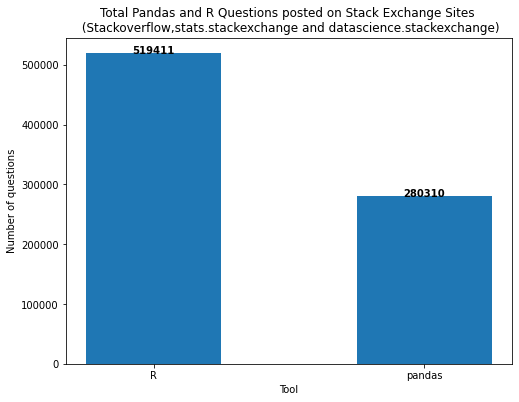

In [47]:
cats =['R', 'pandas']
values= [comb_df.R.sum(), comb_df.pandas.sum()]

# Bar plot
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.bar(x = cats, height = values, width = 0.5 )


# values labels
for i, vals in enumerate(values):
  ax.text(i, vals + 0.5, round(vals),
          ha = 'center', weight = 'bold', color = 'black')

ax.set_title("Total Pandas and R Questions posted on Stack Exchange Sites \n (Stackoverflow,stats.stackexchange and datascience.stackexchange)")
ax.set_xlabel('Tool')
ax.set_ylabel('Number of questions')

plt.show()

### Analysis  
Total R and pandas questions posted on all 3 sites. We see that overall there are lmost twice as many R questions than pandas questions,

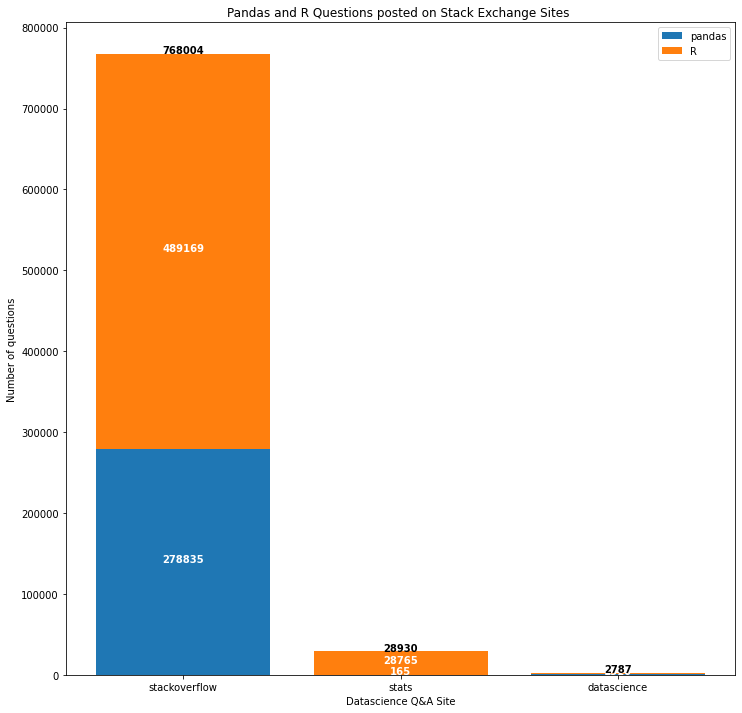

In [48]:
# Let's compare R and pandas question per each site
groups = comb_df.site
values1 = comb_df.pandas
values2 = comb_df.R

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
# Stacked bar chart
ax.bar(groups, values1, label = "pandas")
ax.bar(groups, values2, bottom = values1, label = "R")

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)

# Sum of values
total_values = np.add(values1, values2)

# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black')

ax.legend()

ax.set_title("Pandas and R Questions posted on Stack Exchange Sites ")
ax.set_xlabel('Datascience Q&A Site')
ax.set_ylabel('Number of questions')

plt.show()

### Analysis  
We see that stackoverflow has the highest number of R and pndas question among all three sites and it has more R questions posted than the pandas questions. stats site has a lot more R questions than pandas questions.Datascience site has about equal amount of R and pandas questions but overall it has very few R and pandas questions compared to the other two sites. Statistics questions on stats site is heavily in R.

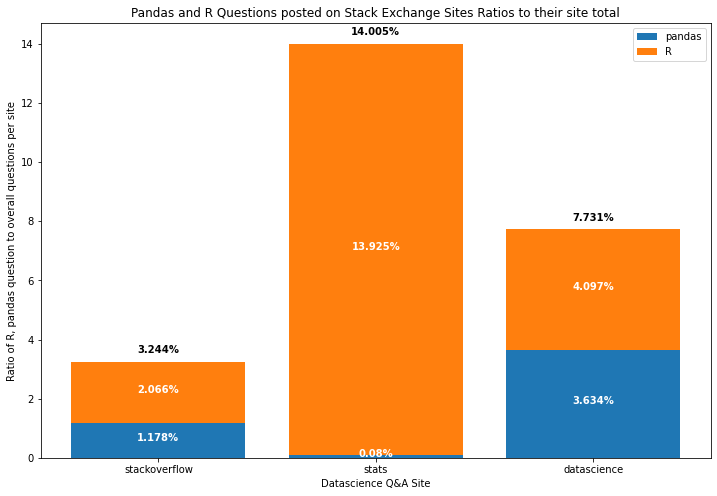

In [49]:
# Let's notmalize the R and pandas questions to the overall questions in each site and compare the ratios
# of R and pandas questions to the overall site questions
groups = comb_df.site
values1 = comb_df.pandas_percent
values2 = comb_df.R_percent

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
# Stacked bar chart
ax.bar(groups, values1, label = "pandas")
ax.bar(groups, values2, bottom = values1, label = "R")

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          str(round(bar.get_height(),3))+'%', ha = 'center',
          color = 'w', weight = 'bold', size = 10)

# Sum of values
total_values = np.add(values1, values2)

# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total + 0.3, str(round(total,3))+'%',
          ha = 'center', weight = 'bold', color = 'black')

ax.legend()
ax.set_title("Pandas and R Questions posted on Stack Exchange Sites Ratios to their site total")
ax.set_xlabel('Datascience Q&A Site')
ax.set_ylabel('Ratio of R, pandas question to overall questions per site')

plt.show()

### Analysis  
We see that only 1-2% of the overall questions on stackoverflow is about R and pandas and R questions are almost twice as much as the pandas questions.  

Stats site has almost 14% of all the questions are in R and very small pandas. Datascience site seems to be very popular for R questions.

Datascience site has about 4% of R and pandas question on the site.

## Let's analyze each site one buy one

In [32]:
df_dict['stackoverflow']

,site,pandas,R,site_total,pandas_percent,R_percent
0,stackoverflow,278883.0,488971.0,23674178.0,1.178005,2.065419


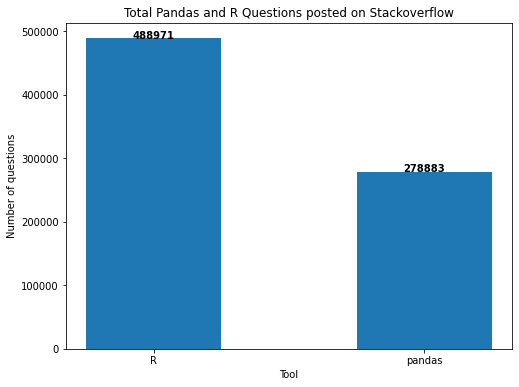

In [35]:
cats =['R', 'pandas']
values= [df_dict['stackoverflow'].R.sum(),df_dict['stackoverflow'].pandas.sum()]

# Bar plot
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.bar(x = cats, height = values, width = 0.5 )

# values labels
for i, vals in enumerate(values):
  ax.text(i, vals + 0.5, round(vals),
          ha = 'center', weight = 'bold', color = 'black')

ax.set_title("Total Pandas and R Questions posted on Stackoverflow")
ax.set_xlabel('Tool')
ax.set_ylabel('Number of questions')

plt.show()

stackoverflow site has almost twice as many R questions than pandas questions. Stackoverflow is alos the most popular site for R and pndas questions.

In [37]:
df_dict['stats']

,site,pandas,R,site_total,pandas_percent,R_percent
1,stats,164.0,28768.0,206552.0,0.079399,13.927728


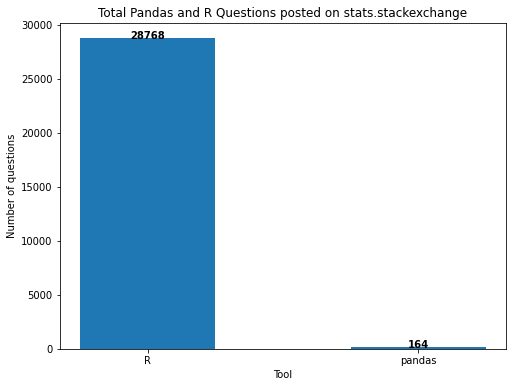

In [36]:
cats =['R', 'pandas']
values= [df_dict['stats'].R.sum(),df_dict['stats'].pandas.sum()]

# Bar plot
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.bar(x = cats, height = values, width = 0.5 )

# values labels
for i, vals in enumerate(values):
  ax.text(i, vals + 0.5, round(vals),
          ha = 'center', weight = 'bold', color = 'black')

ax.set_title("Total Pandas and R Questions posted on stats.stackexchange")
ax.set_xlabel('Tool')
ax.set_ylabel('Number of questions')

plt.show()

### Analysis  

There are very small pandas questions on stats.stackexcahange and heavily R questions. Statisticians seem to use R language more than python overall.

In [38]:
df_dict['datascience']

,site,pandas,R,site_total,pandas_percent,R_percent
2,datascience,1311.0,1477.0,36090.0,3.632585,4.092546


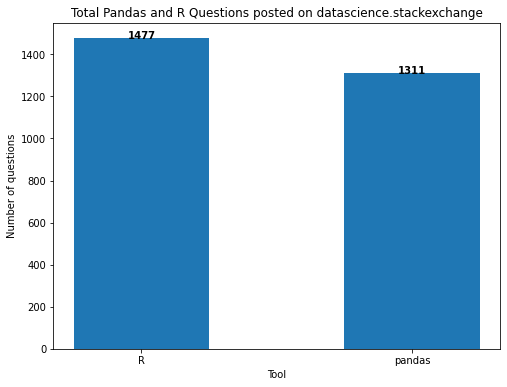

In [39]:
cats =['R', 'pandas']
values= [df_dict['datascience'].R.sum(),df_dict['datascience'].pandas.sum()]

# Bar plot
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.bar(x = cats, height = values, width = 0.5 )

# values labels
for i, vals in enumerate(values):
  ax.text(i, vals + 0.5, round(vals),
          ha = 'center', weight = 'bold', color = 'black')

ax.set_title("Total Pandas and R Questions posted on datascience.stackexchange")
ax.set_xlabel('Tool')
ax.set_ylabel('Number of questions')

plt.show()

### Analysis  

datascience.stackexchnage site has small number of R and pandas questions with R questions slightly higher. This site doesn't seem to be used much for R and pandas questions.

## Analyze site statistics from 2010 through 2022  

It would also make sense to analyze the R and pandas questions trends on these sites over time in addition to the overall numbers we analyzed above. This would show how the popularity of these tools are changing over time.

In [11]:
import calendar

taglist=["tagged=pandas&","tagged=R&"] 
toollist=['pandas', 'R']

# Function collects R and pandas questions on the given list of sites and date range
def get_questions(date_list,site):
    df = pd.DataFrame()
    epoch_list = [calendar.timegm(date_list[i].timetuple()) for i in range(0,len(date_list))]
    for i, y in enumerate(dt_2010_2022, start = 0 ):

        if i < (len(dt_2010_2022)-1):
            df.loc[i,'timestamp'] = date_list[i+1]
            df.loc[i,'site'] = site
            for j,t in enumerate(taglist):
                api_result = requests.get('https://api.stackexchange.com/2.3/questions?fromdate='+str(epoch_list[i])+'&'+'todate='+
                                            str(epoch_list[i+1])+'&'+ 'order=desc&sort=activity&'+ t+'filter=total&site='+ site,verify=False)

                #print('http://api.stackexchange.com/2.3/questions?fromdate='+str(epoch_list[i])+'&'+'todate='+
                                            str(epoch_list[i+1])+'&'+ 'order=desc&sort=activity&'+ t+'filter=total&site='+ site)
                if(api_result.status_code != 200):
                    print("Error in API response ",api_result.status_code)
                    print(site, y,  toollist[j])
                    break;
                else:   
                    api_response = api_result.json()
                    df.loc[i,  toollist[j]] = api_response['total'] # add the columns and counts
                    
            df.loc[i,  'total_R_pandas'] = df.loc[i,'pandas'] + df.loc[i,'R']


    return df
        

### Following code is commented out as it makes 78 API calls ( 13 years, R and pandas, 3 sites) to populate data from 2010 through 2022. Data is already collected and stored using this code in csv files. It can be uncommented if needed to read the data from API

In [ ]:
#generate a date list from 2010 to 2022
dt_2010_2022 = pd.date_range(start="2009-01-01",end="2022-12-31", freq='A')

In [ ]:
#stackoverflow_df = get_questions(dt_2010_2022, 'stackoverflow')
#stackoverflow_df.to_csv('./stackoverflow_2010_2022.csv',index=False)

In [ ]:
#stats_df = get_questions(dt_2010_2022, 'stats.stackexchange')
#stats_df.to_csv('./stats_2010_2022.csv',index=False)

In [ ]:
#datascience_df = get_questions(dt_2010_2022, 'datascience.stackexchange')
#datascience_df.to_csv('./datascience_2010_2022.csv',index=False)


### Read previously generated data from API calls above

In [50]:
#Read from previously generated data (reduce API calls)
stackoverflow_df= pd.read_csv('./stackoverflow_2010_2022.csv')
stats_df= pd.read_csv('./stats_2010_2022.csv')
datascience_df = pd.read_csv('./datascience_2010_2022.csv')


## Stackoverflow site from 2010 through 2022

In [51]:
stackoverflow_df

,timestamp,site,pandas,R,total_R_pandas
0,2010-12-31,stackoverflow,2.0,2258.0,2260.0
1,2011-12-31,stackoverflow,14.0,5826.0,5840.0
2,2012-12-31,stackoverflow,748.0,12149.0,12897.0
3,2013-12-31,stackoverflow,3031.0,22145.0,25176.0
4,2014-12-31,stackoverflow,5660.0,30743.0,36403.0
5,2015-12-31,stackoverflow,8974.0,40597.0,49571.0
6,2016-12-31,stackoverflow,15246.0,44304.0,59550.0
7,2017-12-31,stackoverflow,23160.0,50895.0,74055.0
8,2018-12-31,stackoverflow,31343.0,51970.0,83313.0
9,2019-12-31,stackoverflow,38715.0,49959.0,88674.0


In [54]:
#Let's look at some summary statistics at stackoverflow 2010 through 2022
stackoverflow_df.describe()

,pandas,R,total_R_pandas
count,13.000000,13.000000,13.000000
mean,20660.769231,36419.153846,57079.923077
std,19428.964332,19664.649911,37730.498898
min,2.000000,2258.000000,2260.000000
25%,3031.000000,22145.000000,25176.000000
50%,15246.000000,44304.000000,59550.000000
75%,38715.000000,51079.000000,88674.000000
max,50290.000000,59940.000000,110230.000000


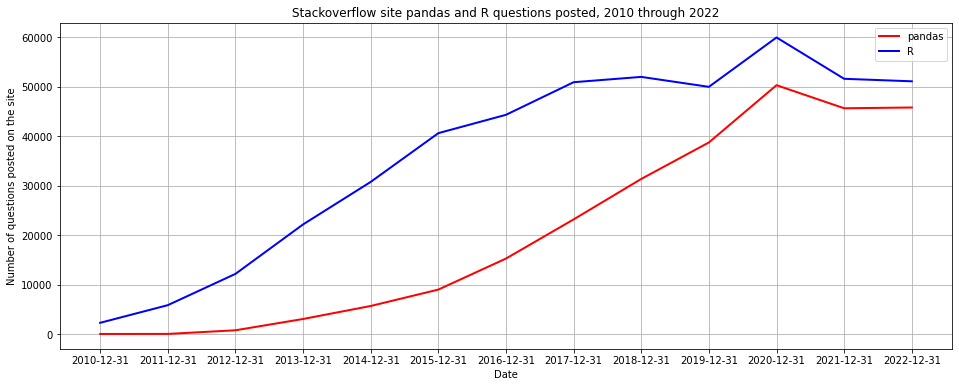

In [55]:
from matplotlib import dates as mdates

fig,ax=plt.subplots(1, 1, figsize=(16, 6))


ax.plot(stackoverflow_df.timestamp,stackoverflow_df.pandas,color='red', linewidth=2, label="pandas")
ax.plot(stackoverflow_df.timestamp,stackoverflow_df.R,color='blue', linewidth=2, label="R")
plt.title('Stackoverflow site pandas and R questions posted, 2010 through 2022')
plt.xlabel('Date')
plt.ylabel('Number of questions posted on the site')
plt.legend(loc='upper right', ncol=1)

ax.grid()
plt.show()

### Analysis  

When we look at the stackoverflow R vs. pandas from 2010 through 2022, we see that until 2016, R questions were about 30,000 more than pandas questions. After 2016, pandas questions increased compared to R questions and last 2 years the difference is about 6,000 questions more in R than pandas per year and seems to be flattened out at 45,000 for pandas and 51,000 for R 2021 to 2022 and there is a slight decrease in number of R questions 2021 to 2022 compared to pandas questions. Pandas questions becoming more popular.

## stats.stackexchange site from 2010 through 2022

In [56]:
stats_df

,timestamp,site,pandas,R,total_R_pandas
0,2010-12-31,stats.stackexchange,0.0,257.0,257.0
1,2011-12-31,stats.stackexchange,0.0,997.0,997.0
2,2012-12-31,stats.stackexchange,1.0,1471.0,1472.0
3,2013-12-31,stats.stackexchange,1.0,1907.0,1908.0
4,2014-12-31,stats.stackexchange,0.0,2552.0,2552.0
5,2015-12-31,stats.stackexchange,11.0,2998.0,3009.0
6,2016-12-31,stats.stackexchange,14.0,2863.0,2877.0
7,2017-12-31,stats.stackexchange,15.0,2565.0,2580.0
8,2018-12-31,stats.stackexchange,23.0,2519.0,2542.0
9,2019-12-31,stats.stackexchange,28.0,2305.0,2333.0


In [57]:
stats_df.describe()

,pandas,R,total_R_pandas
count,13.000000,13.000000,13.000000
mean,12.230769,2143.384615,2155.615385
std,10.693876,802.980338,809.407658
min,0.000000,257.000000,257.000000
25%,1.000000,1907.000000,1908.000000
50%,14.000000,2429.000000,2451.000000
75%,22.000000,2565.000000,2580.000000
max,28.000000,2998.000000,3009.000000


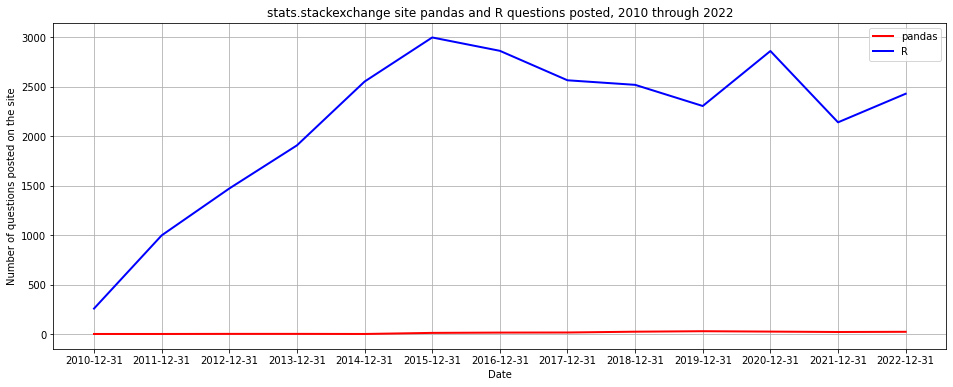

In [58]:
from matplotlib import dates as mdates

fig,ax=plt.subplots(1, 1, figsize=(16, 6))


ax.plot(stats_df.timestamp,stats_df.pandas,color='red', linewidth=2, label="pandas")
ax.plot(stats_df.timestamp,stats_df.R,color='blue', linewidth=2, label="R")
plt.title('stats.stackexchange site pandas and R questions posted, 2010 through 2022')
plt.xlabel('Date')
plt.ylabel('Number of questions posted on the site')
plt.legend(loc='upper right', ncol=1)

ax.grid()
plt.show()

### Analysis  
stats.stackexchange site shows dominated by R questions compared to pandas questions, Pandas questions are pretty flat for the 13 years. R questions had a steep increase from 2010 through 2015 but seems flattened out since 2015 at about 2100 question on average per year.

## datascience.stackexchange site from 2010 through 2022

In [59]:
datascience_df

,timestamp,site,pandas,R,total_R_pandas
0,2010-12-31,datascience.stackexchange,0.0,0.0,0.0
1,2011-12-31,datascience.stackexchange,0.0,0.0,0.0
2,2012-12-31,datascience.stackexchange,0.0,0.0,0.0
3,2013-12-31,datascience.stackexchange,0.0,0.0,0.0
4,2014-12-31,datascience.stackexchange,8.0,54.0,62.0
5,2015-12-31,datascience.stackexchange,8.0,152.0,160.0
6,2016-12-31,datascience.stackexchange,55.0,212.0,267.0
7,2017-12-31,datascience.stackexchange,86.0,204.0,290.0
8,2018-12-31,datascience.stackexchange,208.0,202.0,410.0
9,2019-12-31,datascience.stackexchange,315.0,195.0,510.0


In [60]:
datascience_df.describe()

,pandas,R,total_R_pandas
count,13.000000,13.000000,13.000000
mean,98.076923,111.615385,209.692308
std,111.617996,89.091281,184.169480
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,55.000000,128.000000,267.000000
75%,192.000000,195.000000,320.000000
max,315.000000,212.000000,510.000000


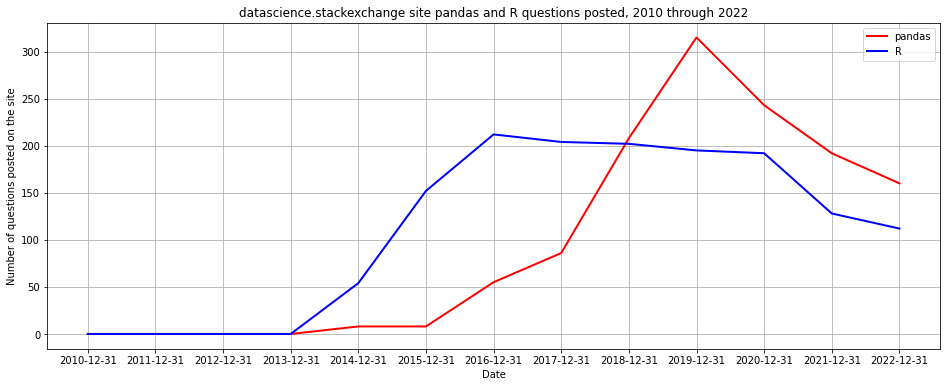

In [61]:
from matplotlib import dates as mdates

fig,ax=plt.subplots(1, 1, figsize=(16, 6))

ax.plot(datascience_df.timestamp,datascience_df.pandas,color='red', linewidth=2, label="pandas")
ax.plot(datascience_df.timestamp,datascience_df.R,color='blue', linewidth=2, label="R")
plt.title('datascience.stackexchange site pandas and R questions posted, 2010 through 2022')
plt.xlabel('Date')
plt.ylabel('Number of questions posted on the site')
plt.legend(loc='upper right', ncol=1)

ax.grid()
plt.show()

### Analysis  

datascience.stackexchange site shows a very interesting trend. When we looked at the overall site wide R and pandas questions earlier, R questions were higher than the pandas questions. The average also is higher for R questions than pandas from 2010 to 2022. When we look at the trend from 2010 to 2022, we see that pandas questions surpassed the R questions end of 2018 and pandas questions on this site peaked end of 2019 and keeps higher than R questions since end of 2019. We still need to be careful as the number of questions on both R and pandas are very small relative to the other two sites (stackoverflow and stats sites)